# Analyses of reconstruction error


### "Do circle-reconstructions differ as a function of distance to the gaussian center?"


In [12]:
import torch
import pickle

import sys
sys.path.append("..") # Adds higher directory to python modules path.

import matplotlib.pyplot as plt
import numpy as np

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

from torchvision import transforms
from data.dspritesb import dSpriteBackgroundDataset
ds = dSpriteBackgroundDataset(transform=transforms.Resize((32,32)),shapetype = 'circle')

### model: staticVAE32 (standard VAE)


In [8]:
from staticvae.models import staticVAE32

vae = staticVAE32(n_latent = 4)
checkpoint = torch.load('../staticvae/trained/staticvae32_dsprites_circle_last_500K')
vae.load_state_dict(checkpoint['model_states']['net'])

training_stats = pickle.load(open('../staticvae/trained/staticvae32_dsprites_circle_500K.pkl', 'rb'))

### first, simply display some reconstructions

random samples from the datasets, their reconstructions, and the difference between the two

/home/benjamin/anaconda3/envs/deepl10/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


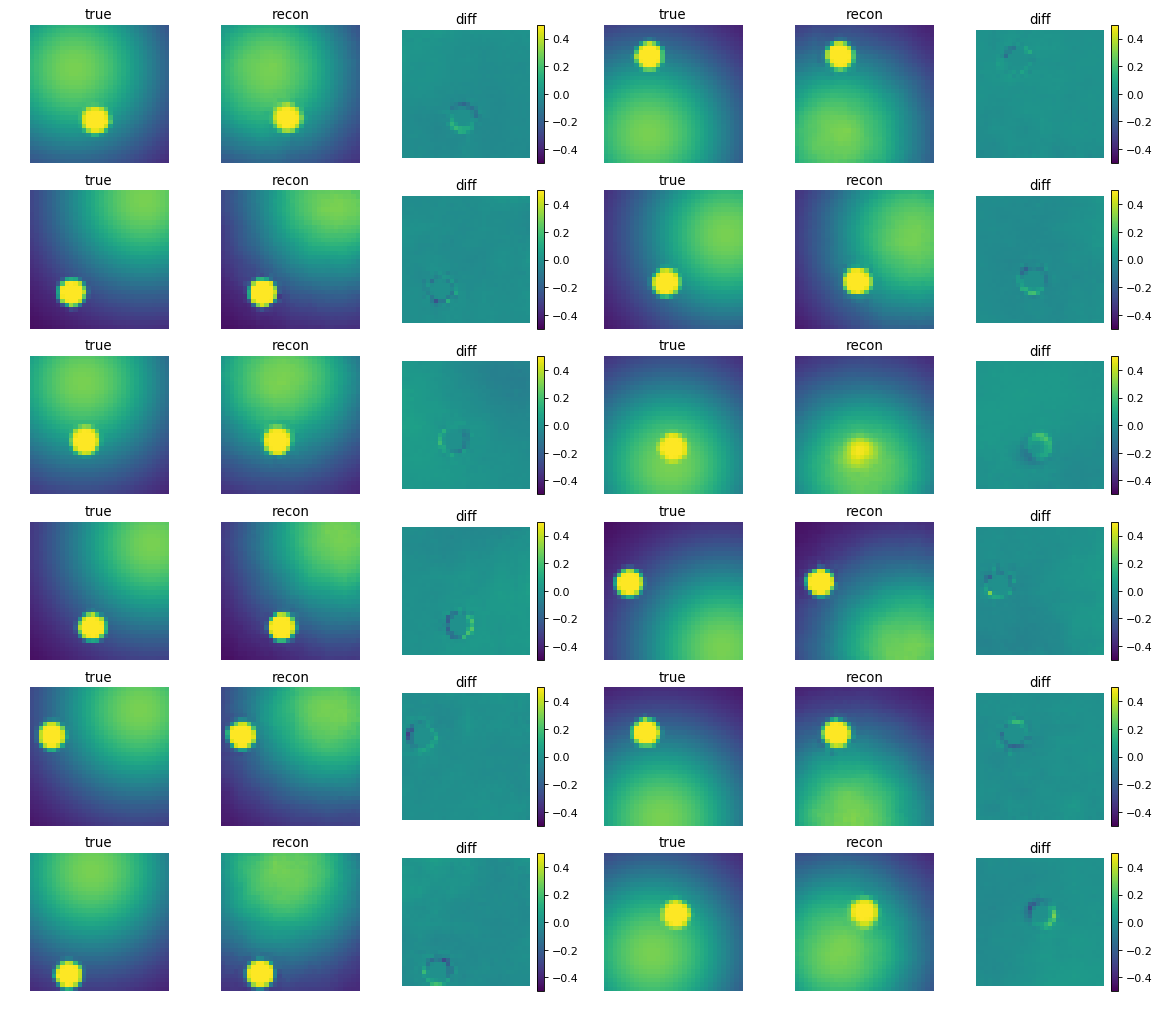

In [53]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
cnt = 0
for ii in range(12):
    x,label = ds[np.random.randint(1000)]
    x = x[np.newaxis, :, :]
    
    recon, mu, logvar = vae(torch.tensor(x).float())
    recon = recon.detach()
    
    diff = x - recon
    
    cnt += 1
    ax = plt.subplot(6,6,cnt)
    ax.imshow(x.squeeze(), vmin=0, vmax=1)
    plt.title('true')
    plt.axis('off')
    
    cnt += 1
    ax = plt.subplot(6,6,cnt)    
    ax.imshow(recon.squeeze(), vmin=0, vmax=1)
    plt.title('recon')
    plt.axis('off')
    
    cnt += 1
    ax = plt.subplot(6,6,cnt)    
    #m = torch.max(torch.abs(diff))
    m = .5
    img = ax.imshow(diff.numpy().squeeze(), vmin=-m, vmax=m)
    fig.colorbar(img)
    plt.title('diff')
    plt.axis('off')
    

tensor(0.2358)